In [11]:
dateparse = lambda Date: pd.datetime.strptime(Date, '%b-%y')
data = pd.read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\ABC4wd.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

print ('\n Parsed Data:')
print (data.head())


 Parsed Data:
            sales4wd  ind.livestock1  ind.livestock2  ind.livestock3  \
Date                                                                   
1990-01-01       505            0.51           79.06            64.4   
1990-02-01       467            0.51           79.04            64.4   
1990-03-01       467            0.51           79.16            64.4   
1990-04-01       593            0.51           79.89            64.4   
1990-05-01       866            0.51           78.28            64.4   

            ind.livestock4  ind.livestock5  ind.livestock6  ind.corn1  \
Date                                                                    
1990-01-01           85.86           41.74           23.16     239.83   
1990-02-01           85.86           41.74           23.16     241.59   
1990-03-01           85.86           41.74           23.16     250.58   
1990-04-01           85.86           41.74           23.16     273.49   
1990-05-01           85.86           41.74

In [12]:
print(data.dtypes)

sales4wd                       int64
ind.livestock1               float64
ind.livestock2               float64
ind.livestock3               float64
ind.livestock4               float64
ind.livestock5               float64
ind.livestock6               float64
ind.corn1                    float64
ind.corn2                    float64
ind.corn3                    float64
ind.corn4                    float64
ind.wheat1                   float64
ind.wheat2                   float64
ind.wheat3                   float64
ind.wheat4                   float64
ind.wheat5                   float64
ind.hay1                     float64
ind.hay2                     float64
ind.dairy1                   float64
ind.dairy2                   float64
ind.dairy3                   float64
ind.dairy4                   float64
ind.dairy5                   float64
ind.dairy6                   float64
ind.BRLCSPOT.D7              float64
ind.STRTXOK.D7               float64
ind.FarmIncome               float64
i

In [13]:
series1= data.iloc[:,0]
split_point = len(series1)-12

dataset1,validation1 = series1[0:split_point],series1[split_point:]
print('Dataset %d, validation %d' % (len(dataset1),len(validation1)))
dataset1.to_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv',header =False)
validation1.to_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\\validation1.csv',header =False)

Dataset 312, validation 12


In [14]:
# Developing a Method for Model Evaluation.

#Persistence Model (Baseline performance - naive forecast)
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
#load data
dataset = pd.read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#header=0: We must specify the header information at row 0.
#parse dates=True: We give the function a hint that data in the first column contains dates that need to be parsed.
#index col=0: We hint that the first column contains the index information for the timeseries.
#squeeze=True: We hint that we only have one data column and that we are interested in a Series and not a DataFrame.

X = dataset.values
X=X.astype('float32')
train_size = int(len(X)*0.5)
train,test = X[0:train_size], X[train_size:]

# walk forward validation
history = [x for x in train]

predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('Prediction %d, Expected %d' %(yhat,obs))

# print performance
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' % rmse)

forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
bias = sum(forecast_errors)*1.0/len(test)
print('Bias: %.3f' % bias)

percent_forecast_errors = [abs(test[i]-predictions[i])*100/test[i] for i in range(len(test))]
MAPE = sum(percent_forecast_errors)*1.0/len(test)
print('MAPE: %.3f' % MAPE)

## DATA ANALYSIS

# summmary statistics
import pandas as pd
dataset = pd.read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(dataset.describe())

Prediction 278, Expected 215
Prediction 215, Expected 175
Prediction 175, Expected 335
Prediction 335, Expected 642
Prediction 642, Expected 341
Prediction 341, Expected 177
Prediction 177, Expected 176
Prediction 176, Expected 128
Prediction 128, Expected 256
Prediction 256, Expected 571
Prediction 571, Expected 160
Prediction 160, Expected 325
Prediction 325, Expected 255
Prediction 255, Expected 206
Prediction 206, Expected 448
Prediction 448, Expected 704
Prediction 704, Expected 290
Prediction 290, Expected 344
Prediction 344, Expected 244
Prediction 244, Expected 171
Prediction 171, Expected 202
Prediction 202, Expected 780
Prediction 780, Expected 223
Prediction 223, Expected 444
Prediction 444, Expected 292
Prediction 292, Expected 171
Prediction 171, Expected 381
Prediction 381, Expected 833
Prediction 833, Expected 351
Prediction 351, Expected 308
Prediction 308, Expected 240
Prediction 240, Expected 243
Prediction 243, Expected 286
Prediction 286, Expected 612
Prediction 612

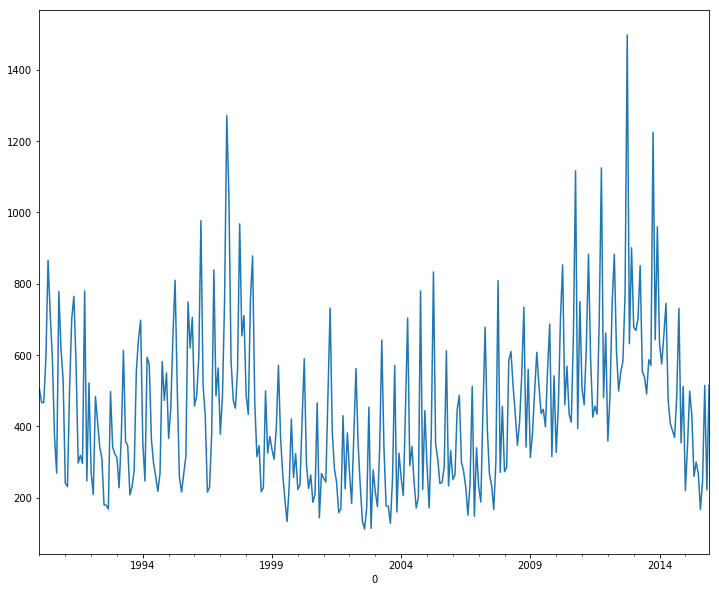

In [15]:
# line plot of time series
from matplotlib import pyplot
dataset = pd.read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(figsize=(12,10))
dataset.plot()
pyplot.show()
## Obseravtion : There is clear cyclicity and seasonality

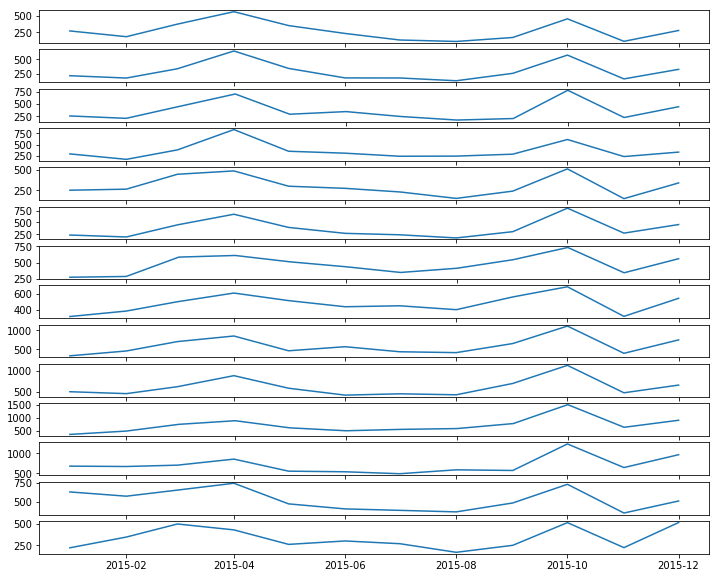

In [16]:
# seasonal plots
# multiple line plots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
dataset1 = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv',index_col=0,header=None, parse_dates=True, squeeze=True)

groups = dataset1['2002':'2015'].groupby(Grouper(freq='A'))
groups.head()

years = DataFrame()
pyplot.figure(figsize=(12,10))
n_groups = len(groups)
i = 1
for name, group in groups:
    pyplot.subplot(n_groups,1, i)
    i += 1
    pyplot.plot(group)
pyplot.show()

## Obseravtion : Clear seasonality highest sales in march/april and august

In [17]:

# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
dataset1 = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv',index_col=0,header=None, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

# Obseravtion : The distribution is not Gaussian.
# Obseravtion :The shape has a long right tail and may suggest an exponential distribution. Power transform can be helpful


NameError: name 'series' is not defined

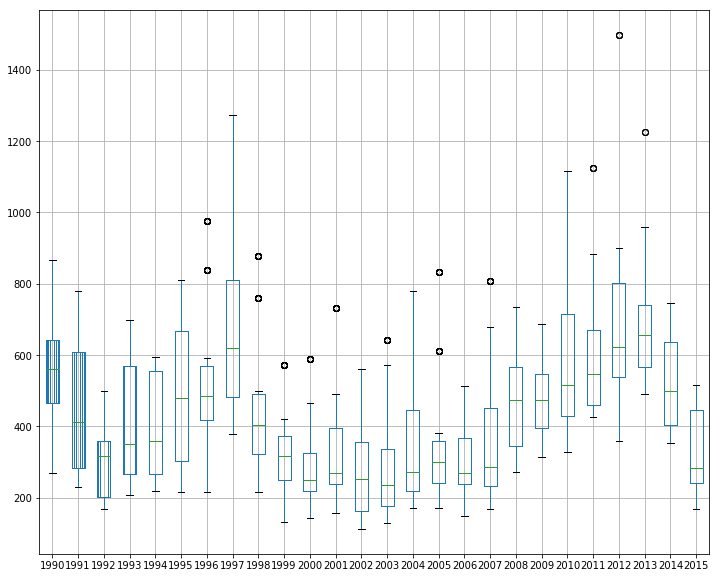

In [49]:
# boxplots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
dataset1 = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv',index_col=0,header=None, parse_dates=True, squeeze=True)
groups = dataset1['1990':'2015'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure(figsize=(12,10))
for name, group in groups:
    years[name.year] = group.values
    years.boxplot()
pyplot.show()

##Obseravtion : definitely there seems to be cyclicity and outliers seems to be part of seasonal cycle


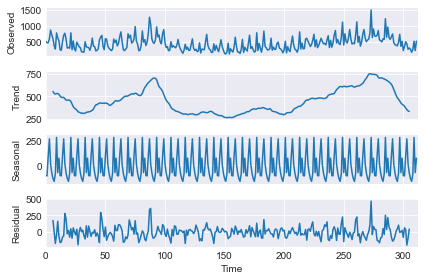

In [57]:
##Time series decomposition
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
result = seasonal_decompose(X, model='additive', freq=12)
result.plot()
pyplot.show()

In [44]:
# ARIMA Modelling
#Manually Configure the ARIMA model
# create and summarize stationary version of time series
from pandas import read_csv
from pandas import Series
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')

# difference data to remove seasonality
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]



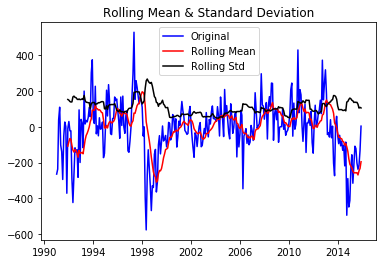

Results of ADF Test:
ADF Statistic: -4.055228
p-value: 0.001147
Critical Values:
(-4.0552279393005044, 0.0011473896039933429, 12, 287, {'1%': -3.4533421678062721, '5%': -2.8716638282872822, '10%': -2.5721643813813451}, 3446.2026310071701)
Results of KPSS Test:
Test Statistic            0.092806
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [48]:
##Checking Stationarity :
#1- Draw Summary statistics graph
#2- Conduct two hypothesis test - 1)ADF 2)KPSS

#1- Draw Summary statistics graph
def test_stationarity_chart(timeseries):
    timeseries = pd.DataFrame(timeseries)
    #Determing rolling statistics
    roll_mean = timeseries.rolling(12).mean()
    roll_std = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

test_stationarity_chart(stationary)

#2- Conduct two hypothesis test - 1)ADF 2)KPSS
# Augmented Dickey fuller test
print ('Results of ADF Test:')
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
print(result)
#for key, value in result[4].items():
#print('\t%s: %.3f' % (key, value))

# Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”)
from statsmodels.tsa.stattools import kpss

print ('Results of KPSS Test:')
kpsstest = kpss(stationary, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)
   
# save
stationary.to_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\stationary.csv', header=False)

#Obseravtion : ADF, we can reject the null hytoothesis, means series can be considered stationary.
#Obseravtion : KPSS, we fail to reject the null hytoothesis, means series can be considered stationary.

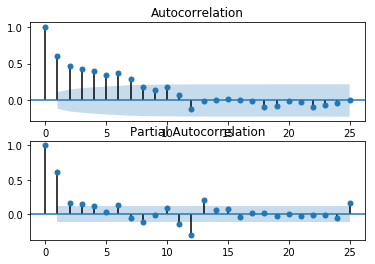

In [26]:
# ACF and PACF plots of stationarised time series 
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\stationary.csv', header=None, index_col=0, parse_dates=True,squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca())
pyplot.show()

#OBSERVATIONS:
# obs ACF: ACF shows a significant lag for first 8 months
# obs PACF: PACF shows a significant lag for 1 & 2 month. Might represent a p =2 , AR order . Also, there seems to be seasonality as seen with significant values at lag 12 and lag 13 ( Seasonality of 12)
# Both Acf and Pacf shows some kind of tapering off to zero, therefore both AR  and MA terms might be present.
# d = 0 as already stationarised by seasoanl differencing, (p,d,q) - ( 2,0,1), (2,0,2) and ( 2,0,0) can be initially evaluated

In [27]:
# evaluate manually configured ARIMA model ( 2,0,2)
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(2,0,2))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=209.364, Expected=215.000
>Predicted=139.888, Expected=175.000
>Predicted=354.658, Expected=335.000
>Predicted=528.490, Expected=642.000
>Predicted=389.286, Expected=341.000
>Predicted=220.873, Expected=177.000
>Predicted=105.773, Expected=176.000
>Predicted=133.739, Expected=128.000
>Predicted=176.764, Expected=256.000
>Predicted=502.814, Expected=571.000
>Predicted=182.146, Expected=160.000
>Predicted=313.772, Expected=325.000
>Predicted=255.592, Expected=255.000
>Predicted=208.293, Expected=206.000
>Predicted=362.729, Expected=448.000
>Predicted=714.138, Expected=704.000
>Predicted=384.670, Expected=290.000
>Predicted=163.456, Expected=344.000
>Predicted=279.213, Expected=244.000
>Predicted=169.787, Expected=171.000
>Predicted=299.007, Expected=202.000
>Predicted=554.999, Expected=780.000
>Predicted=282.522, Expected=223.000
>Predicted=366.585, Expected=444.000
>Predicted=340.356, Expected=292.000
>Predicted=244.408, Expected=171.000
>Predicted=448.846, Expected=381.000
>

In [1]:
# grid search ARIMA parameters for time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

C:\Users\ankit\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ARIMA(0, 0, 1) RMSE=125.666
ARIMA(0, 0, 2) RMSE=120.961
ARIMA(0, 0, 3) RMSE=118.530
ARIMA(0, 1, 1) RMSE=112.357
ARIMA(0, 1, 2) RMSE=112.743
ARIMA(0, 1, 3) RMSE=113.014
ARIMA(0, 2, 1) RMSE=130.701
ARIMA(1, 0, 0) RMSE=116.169
ARIMA(1, 0, 1) RMSE=111.409
ARIMA(1, 0, 2) RMSE=111.211
ARIMA(1, 1, 0) RMSE=120.671
ARIMA(1, 1, 1) RMSE=112.945
ARIMA(1, 1, 2) RMSE=113.087
ARIMA(1, 2, 0) RMSE=173.005
ARIMA(2, 0, 0) RMSE=113.718
ARIMA(2, 0, 1) RMSE=111.098
ARIMA(2, 0, 2) RMSE=111.275
ARIMA(2, 0, 3) RMSE=112.102
ARIMA(2, 1, 0) RMSE=116.343
ARIMA(2, 1, 1) RMSE=113.038
ARIMA(2, 2, 0) RMSE=153.585
ARIMA(2, 2, 1) RMSE=116.568
ARIMA(2, 2, 2) RMSE=113.259
Best ARIMA(2, 0, 1) RMSE=111.098


                0
count  156.000000
mean     1.488704
std    111.445334
min   -416.207274
25%    -59.919211
50%      6.624516
75%     67.176827
max    375.180422


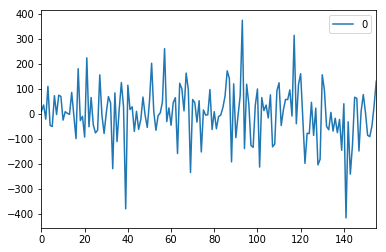

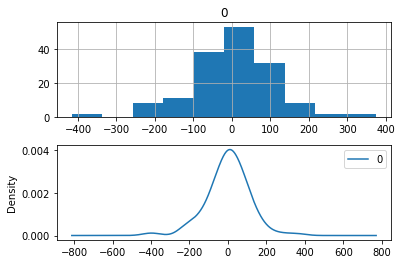

In [2]:
# summarize ARIMA forecast residuals, 
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load data
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(2,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

# plot Residuals
residuals.plot()
pyplot.show()

# plot histogram
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()


# Observation: residuals looks like a Gaussian distribution with mean nearby zero ( 1.48)

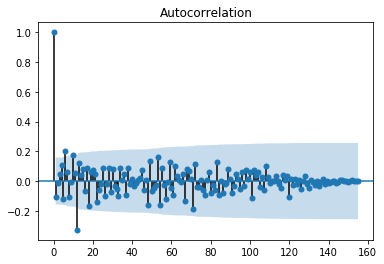

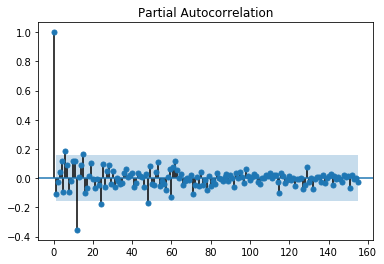

In [3]:
# ACF and PACF plots of residual errors 
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(residuals, ax=pyplot.gca())
pyplot.show()
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

#Observation : Some level of correlation is definitely captured by the model but looks like there is still some correlation pending in the residuals
# log or power transform initially to the series might be helpful

In [4]:
# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# load data
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(2,0,1))
model_fit = model.fit(trend='nc', disp=0)

# save model
model_fit.save('D:\Data Science Projects\Time series forecasting\Arima Implementation\model.pkl')


In [5]:
# load finalized model and make a prediction
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMAResults
import numpy
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
series = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
months_in_year = 12
model_fit = ARIMAResults.load('D:\Data Science Projects\Time series forecasting\Arima Implementation\model.pkl')
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 165.749


>Predicted=165.749, Expected=243.000
>Predicted=322.454, Expected=222.000
>Predicted=422.051, Expected=258.000
>Predicted=290.842, Expected=335.000
>Predicted=171.714, Expected=234.000
>Predicted=249.010, Expected=247.000
>Predicted=215.417, Expected=152.000
>Predicted=89.180, Expected=102.000
>Predicted=190.497, Expected=200.000
>Predicted=466.750, Expected=611.000
>Predicted=244.684, Expected=205.000
>Predicted=504.631, Expected=328.000
RMSE: 94.279


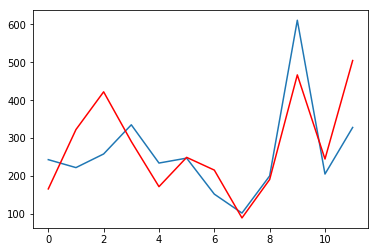

Bias: -16.332
MAPE: 28.092


In [8]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# load and prepare datasets
dataset = read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv(r'D:\Data Science Projects\Time series forecasting\Arima Implementation\validation1.csv', header=None, index_col=0, parse_dates=True,squeeze=True)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('D:\Data Science Projects\Time series forecasting\Arima Implementation\model.pkl')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict
    model = ARIMA(diff, order=(2,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

forecast_errors = [y[i]-predictions[i] for i in range(len(y))]
bias = sum(forecast_errors)*1.0/len(y)
print('Bias: %.3f' % bias)

percent_forecast_errors = [abs(y[i]-predictions[i])*100/y[i] for i in range(len(y))]
MAPE = sum(percent_forecast_errors)*1.0/len(y)
print('MAPE: %.3f' % MAPE)

#Note : We made the forecast with the rolling window, forecast at next level only


In [ ]:
#Summary

#Naive Forecast(rolling window)
#RMSE: 254.120
#Bias: 1.526
#MAPE: 46.090

# ARIMA Forecast(rolling window)
#RMSE: 94.279
#Bias: -16.332
#MAPE: 28.092